In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import scipy.stats as stats

In [2]:
tmbdMovieData = pd.read_csv(r'C:\Users\anike\Aniket\DA Projects\ref\tmdb.movies.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)

In [3]:
#to drop null values
tmbdMovieData.dropna()

#converting datatype of release_date column to datetime 
tmbdMovieData['release_date'] = pd.to_datetime(tmbdMovieData['release_date'])

#removing white space
tmbdMovieData['original_title'] = tmbdMovieData['original_title'].str.strip()

#to drop duplicate values
tmbdMovieData = tmbdMovieData.drop_duplicates()

tmbdMovieData.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
tmbdMovieData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          23036 non-null  object        
 1   id                 25497 non-null  int64         
 2   original_language  25497 non-null  object        
 3   original_title     25497 non-null  object        
 4   popularity         25497 non-null  float64       
 5   release_date       25497 non-null  datetime64[ns]
 6   title              25497 non-null  object        
 7   vote_average       25497 non-null  float64       
 8   vote_count         25497 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.9+ MB


In [5]:
#to check null values
tmbdMovieData.isnull().sum()

genre_ids            2461
id                      0
original_language       0
original_title          0
popularity              0
release_date            0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [6]:
#to check if there are duplicates
tmbdMovieData.duplicated().value_counts()

False    25497
Name: count, dtype: int64

In [7]:
tmbdMovieData.shape

(25497, 9)

In [8]:
#read movies data file and make sure values are in the same format, and drop null values
tnMovieData = pd.read_csv(r'C:\Users\anike\Aniket\DA Projects\ref\tn.movie_budgets.csv', na_filter = True, na_values ='[]', encoding='utf-8', index_col=0)
tnMovieData.head(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
#frop null values
tnMovieData.dropna()

#converting datatype of release_date column to datetime
tnMovieData['release_date'] = pd.to_datetime(tnMovieData['release_date'])

#to drop duplicate values
tnMovieData = tnMovieData.drop_duplicates()

tnMovieData.head(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [10]:
#removing white space, '$', replace ',' and convert it to int 
tnMovieData['movie'] = tnMovieData['movie'].str.strip()
tnMovieData['production_budget'] = tnMovieData['production_budget'].str.strip('$').str.replace(",", "", regex=True).astype(int)
tnMovieData['domestic_gross'] = tnMovieData['domestic_gross'].str.strip('$').str.replace(",", "", regex=True).astype(int)
tnMovieData['worldwide_gross'] = tnMovieData['worldwide_gross'].str.strip("$").str.replace(",", "", regex=True).astype(float)
tnMovieData.head(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,425000000,760507625,2.776345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09
3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09


In [11]:
tnMovieData['dom_gross / budget'] = tnMovieData['domestic_gross'] / tnMovieData['production_budget']
tnMovieData['ww_gross / budget'] = tnMovieData['worldwide_gross'] / tnMovieData['production_budget']
tnMovieData['dom_profit'] = tnMovieData['domestic_gross'] - tnMovieData['production_budget']
tnMovieData['profit'] = tnMovieData['worldwide_gross'] - tnMovieData['production_budget']
tnMovieData.head(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
id,,,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2.776345e+09,1.789430,6.532577,335507625,2.351345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,0.587101,2.546673,-169536125,6.350639e+08
3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08,0.122178,0.427892,-307237650,-2.002376e+08
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09,1.388403,4.243841,128405868,1.072414e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,1.956408,4.153696,303181382,9.997217e+08


In [12]:
tnMovieData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        5782 non-null   datetime64[ns]
 1   movie               5782 non-null   object        
 2   production_budget   5782 non-null   int32         
 3   domestic_gross      5782 non-null   int32         
 4   worldwide_gross     5782 non-null   float64       
 5   dom_gross / budget  5782 non-null   float64       
 6   ww_gross / budget   5782 non-null   float64       
 7   dom_profit          5782 non-null   int32         
 8   profit              5782 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int32(3), object(1)
memory usage: 384.0+ KB


In [13]:
tnMovieData.isnull().sum()

release_date          0
movie                 0
production_budget     0
domestic_gross        0
worldwide_gross       0
dom_gross / budget    0
ww_gross / budget     0
dom_profit            0
profit                0
dtype: int64

In [14]:
tnMovieData.duplicated().value_counts()

False    5782
Name: count, dtype: int64

In [15]:
tnMovieData.shape

(5782, 9)

In [16]:
tnMovieData = tnMovieData.rename(columns={"movie":"title"})
tnMovieData.head(5)

,release_date,title,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
id,,,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2.776345e+09,1.789430,6.532577,335507625,2.351345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,0.587101,2.546673,-169536125,6.350639e+08
3,2019-06-07,Dark Phoenix,350000000,42762350,1.497624e+08,0.122178,0.427892,-307237650,-2.002376e+08
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1.403014e+09,1.388403,4.243841,128405868,1.072414e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,1.956408,4.153696,303181382,9.997217e+08


In [17]:
#special cases where movie titles do not match
tnMovieData['title'].replace({'Harry Potter and the Deathly Hallows: Part I' : 'Harry Potter and the Deathly Hallows: Part 1'}, inplace=True)
tnMovieData['title'].replace({'Harry Potter and the Deathly Hallows: Part II' : 'Harry Potter and the Deathly Hallows: Part 2'}, inplace=True)
tnMovieData['title'].replace({'Fast & Furious 6':'Fast and Furious 6'}, inplace=True)
tnMovieData['title'].replace({'Star Wars: The Force Awakens' : 'Star Wars Ep. VII: The Force Awakens'}, inplace=True)
tnMovieData['title'].replace({'Star Wars: The Last Jedi' : 'Star Wars Ep. VIII: The Last Jedi'}, inplace=True)

In [18]:
#merge both datasets
movieDataset = tmbdMovieData.merge(tnMovieData, how='left')

In [19]:
movieDataset = movieDataset.dropna()
movieDataset.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,125000000.0,296131568.0,960431568.0,2.369053,7.683453,171131568.0,835431568.0
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0,1.318674,2.999218,52581232.0,329870992.0
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0,1.837843,3.653861,142433331.0,451156389.0
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0,6.393208,12.151517,161796233.0,334545516.0
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0,1.828601,5.222029,132576195.0,675524642.0


In [20]:
#check to see if worldwide_gross and domestic_gross is 0 to remove outliers
domGrossCount = 0
for x in movieDataset['domestic_gross']:
    if x == 0:
        domGrossCount += 1
print(domGrossCount)

wwGrossCount = 0
for x in movieDataset['worldwide_gross']:
    if x == 0:
        wwGrossCount += 1
print(wwGrossCount)

66
41


In [21]:
movieData = movieDataset.drop(movieDataset[movieDataset['domestic_gross'] <1 ].index)
movieData.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,125000000.0,296131568.0,960431568.0,2.369053,7.683453,171131568.0,835431568.0
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0,1.318674,2.999218,52581232.0,329870992.0
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0,1.837843,3.653861,142433331.0,451156389.0
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0,6.393208,12.151517,161796233.0,334545516.0
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0,1.828601,5.222029,132576195.0,675524642.0


In [22]:
movieData.dtypes

genre_ids                     object
id                             int64
original_language             object
original_title                object
popularity                   float64
release_date          datetime64[ns]
title                         object
vote_average                 float64
vote_count                     int64
production_budget            float64
domestic_gross               float64
worldwide_gross              float64
dom_gross / budget           float64
ww_gross / budget            float64
dom_profit                   float64
profit                       float64
dtype: object

In [23]:
def remove_outliers(data, column):
    p25 = np.percentile(data[column], 25)
    p75 = np.percentile(data[column], 75)
    iqr = p75 - p25
    outlier_threshold = p75 + (1.5 * iqr)
    outliers_indices = data[data[column] > outlier_threshold].index
    filtered_data = data.drop(index=outliers_indices)
    return filtered_data

In [24]:
domGrossmovie = remove_outliers(movieData, 'domestic_gross')

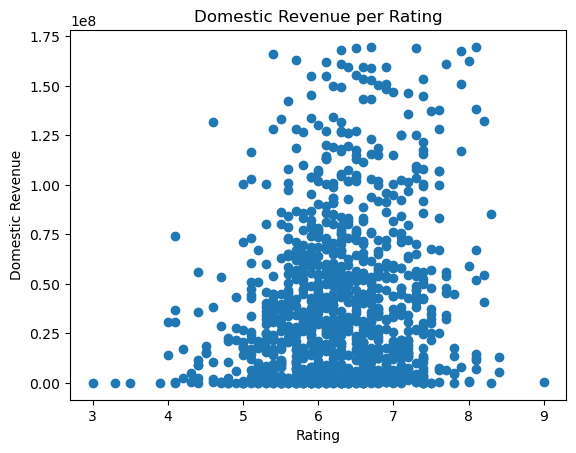

In [25]:
plt.scatter(domGrossmovie['vote_average'], domGrossmovie['domestic_gross'])
plt.xlabel('Rating')
plt.ylabel('Domestic Revenue')
plt.title('Domestic Revenue per Rating')

plt.show()

C:\Users\anike\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


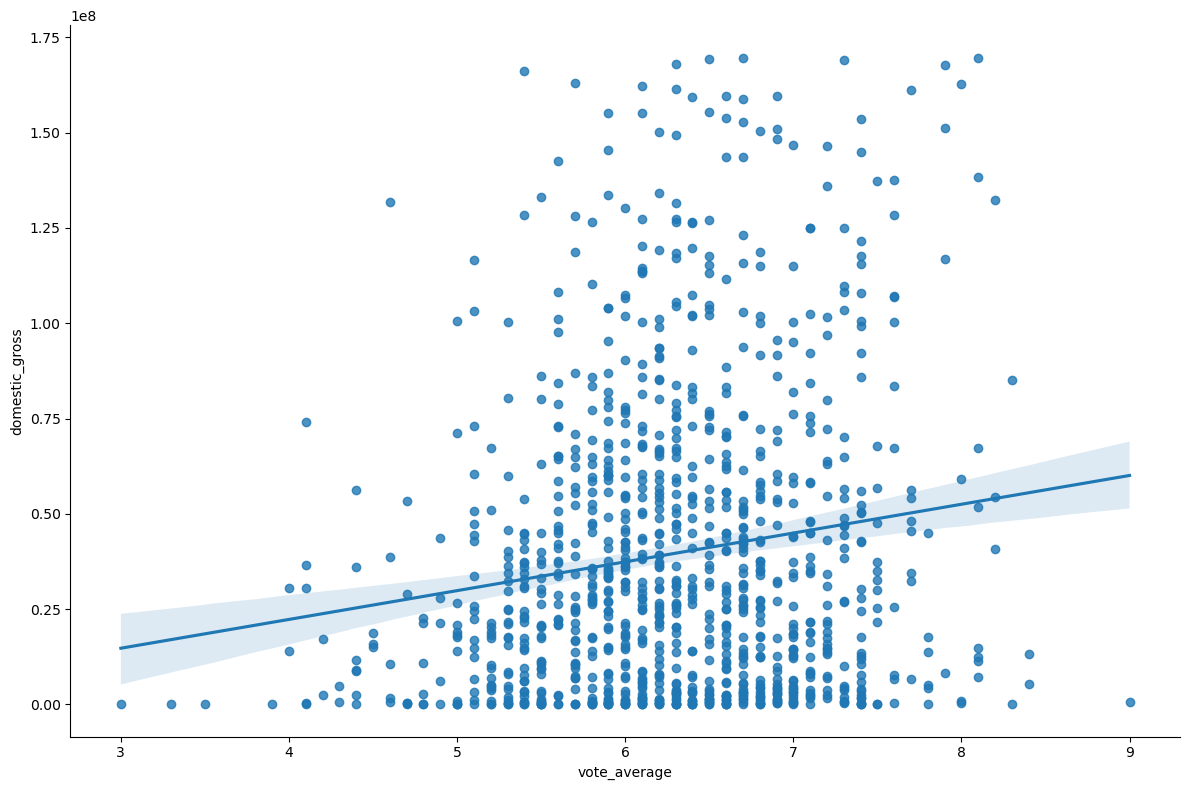

In [26]:
#create line of best fit
sns.lmplot(x = 'vote_average', y = 'domestic_gross', data = domGrossmovie, height = 8, aspect = 1.5);

In [27]:
wwGrossmovie = remove_outliers(movieData, 'worldwide_gross')

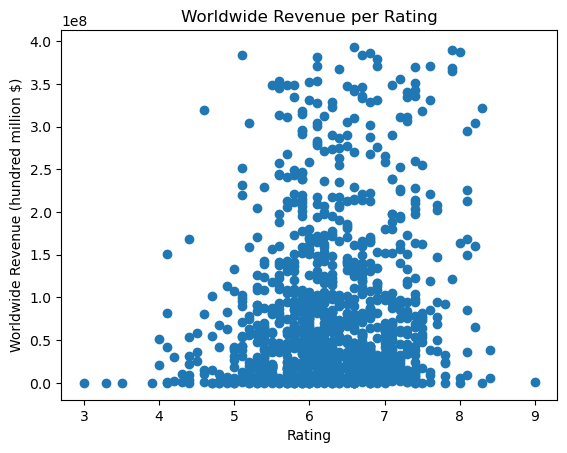

In [28]:
plt.scatter(wwGrossmovie['vote_average'], wwGrossmovie['worldwide_gross'])
plt.xlabel('Rating')
plt.ylabel('Worldwide Revenue (hundred million $)')
plt.title('Worldwide Revenue per Rating')
plt.show()

C:\Users\anike\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


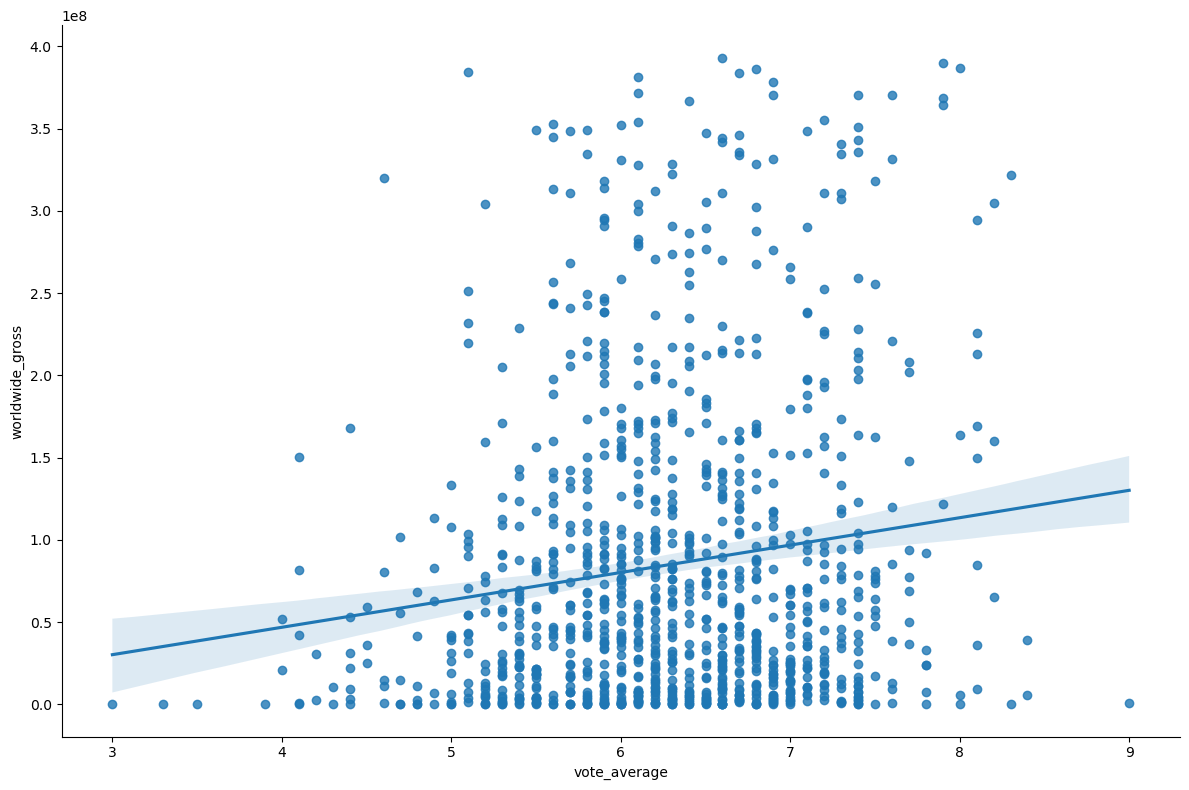

In [29]:
#create line of best fit
sns.lmplot(x = 'vote_average', y = 'worldwide_gross', data = wwGrossmovie, height = 8, aspect = 1.5);

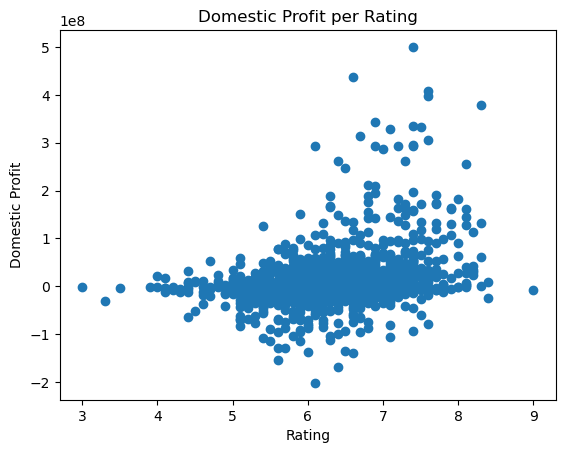

In [30]:
plt.scatter(movieData['vote_average'], movieData['dom_profit'])
plt.xlabel('Rating')
plt.ylabel('Domestic Profit')
plt.title('Domestic Profit per Rating')
plt.show()

C:\Users\anike\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


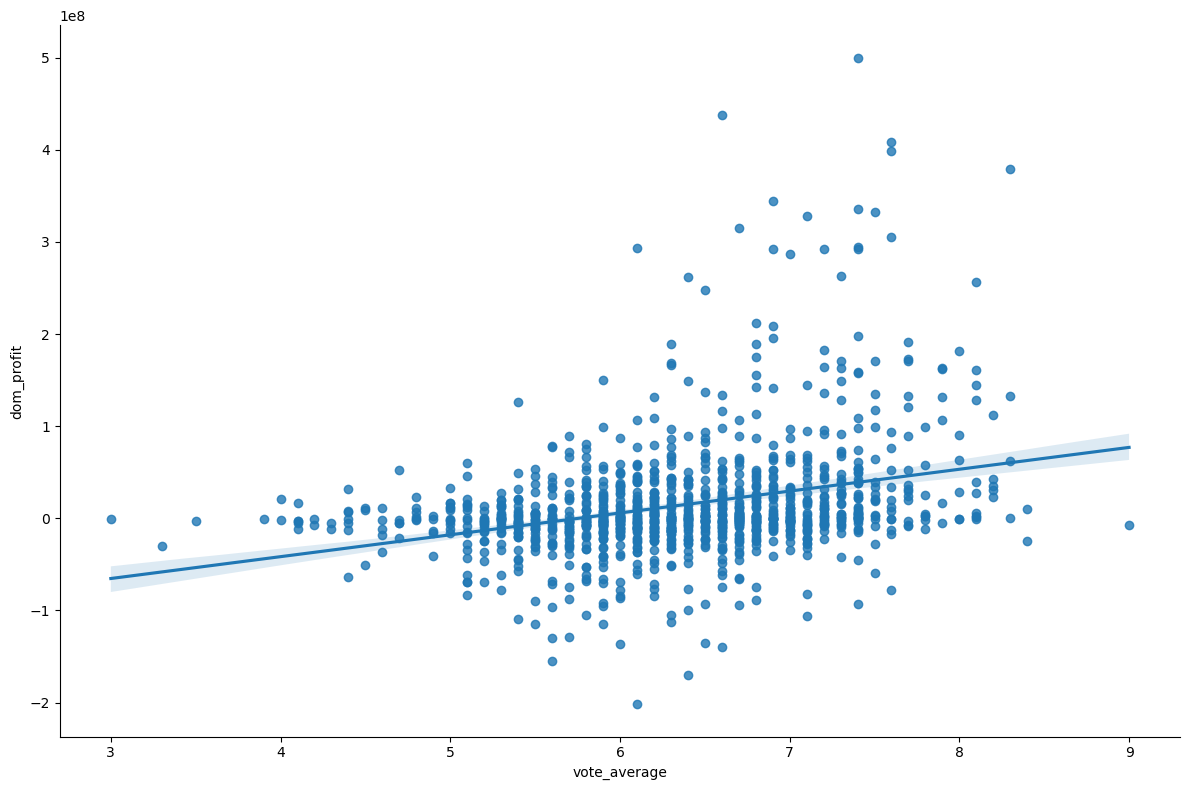

In [31]:
#create line of best fit
sns.lmplot(x = 'vote_average', y = 'dom_profit', data = movieData, height = 8, aspect = 1.5);

In [32]:
#determine outliers
p25 = np.percentile(movieData['profit'], 25)
p75 = np.percentile(movieData['profit'], 75)
iqr = p75 - p25
outlier = p75 + (1.5 * iqr)
#create db that removes upper outliers
wwProfitmovie = movieData.drop(movieData[movieData['worldwide_gross'] > outlier].index)


#create db that removes upper outliers
voteAvgmovie = wwProfitmovie.drop(wwProfitmovie[wwProfitmovie['vote_average'] > outlier].index)
voteAvgmovie.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
20,"[28, 18, 9648, 53]",2501,en,The Bourne Identity,17.935,2002-06-14,The Bourne Identity,7.4,5406,60000000.0,121468960.0,214357371.0,2.024483,3.572623,61468960.0,154357371.0
21,"[28, 35]",37834,en,Knight and Day,17.713,2010-06-23,Knight and Day,6.0,2494,117000000.0,76423035.0,258751370.0,0.653188,2.211550,-40576965.0,141751370.0
23,"[18, 10749]",41233,en,Step Up 3D,17.174,2010-08-06,Step Up 3D,6.7,1160,30000000.0,42400223.0,165889117.0,1.413341,5.529637,12400223.0,135889117.0
24,"[53, 28, 12, 35, 80]",34544,en,The A-Team,17.097,2010-06-11,The A-Team,6.3,2703,110000000.0,77222099.0,177241171.0,0.702019,1.611283,-32777901.0,67241171.0
26,"[28, 35, 80, 53]",9737,en,Bad Boys,16.608,1995-04-07,Bad Boys,6.6,2936,23000000.0,65647413.0,141247413.0,2.854235,6.141192,42647413.0,118247413.0


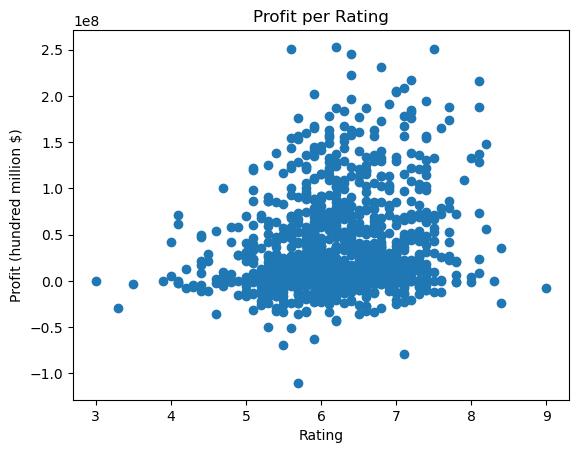

In [33]:
plt.scatter(voteAvgmovie['vote_average'], voteAvgmovie['profit'])
plt.xlabel('Rating')
plt.ylabel('Profit (hundred million $)')
plt.title('Profit per Rating')
plt.show()

C:\Users\anike\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


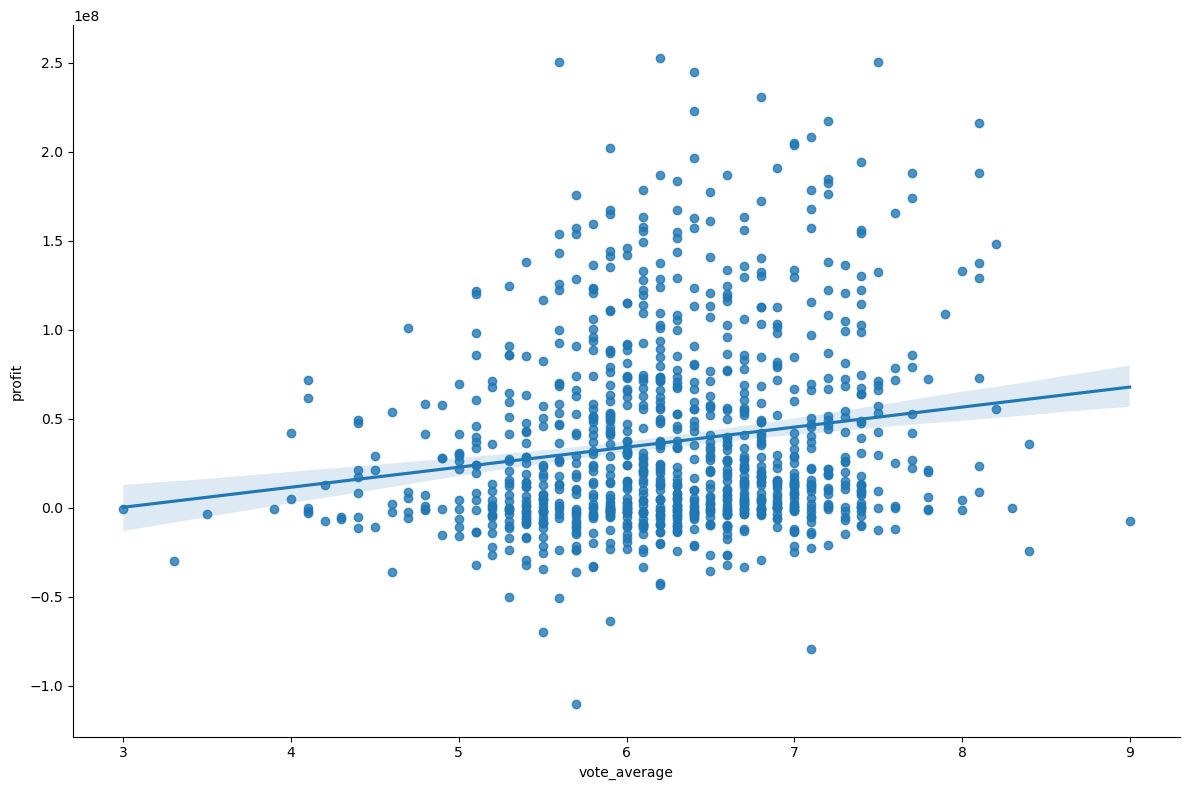

In [34]:
#create line of best fit
sns.lmplot(x = 'vote_average', y = 'profit', data = voteAvgmovie, height = 8, aspect = 1.5);

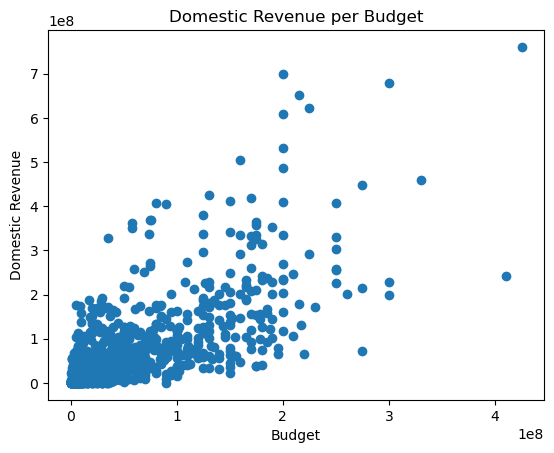

In [35]:
plt.scatter(movieData['production_budget'], movieData['domestic_gross'])
plt.xlabel('Budget')
plt.ylabel('Domestic Revenue')
plt.title('Domestic Revenue per Budget')
plt.show()

C:\Users\anike\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


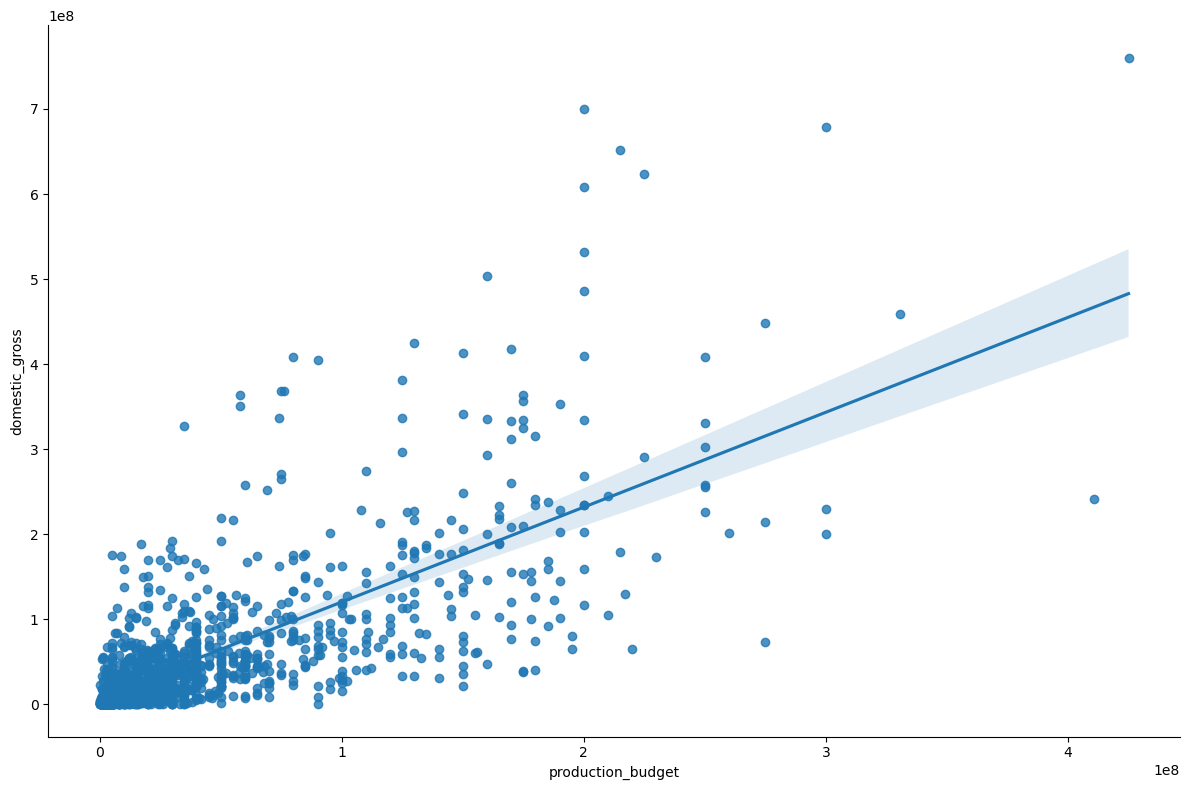

In [36]:
#create line of best fit
sns.lmplot(x = 'production_budget', y = 'domestic_gross', data = movieData, height = 8, aspect = 1.5);

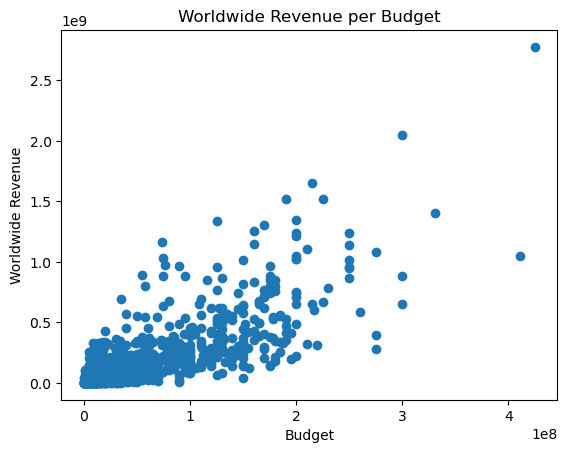

In [37]:
plt.scatter(movieData['production_budget'], movieData['worldwide_gross'])
plt.xlabel('Budget')
plt.ylabel('Worldwide Revenue')
plt.title('Worldwide Revenue per Budget')
plt.show()

C:\Users\anike\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


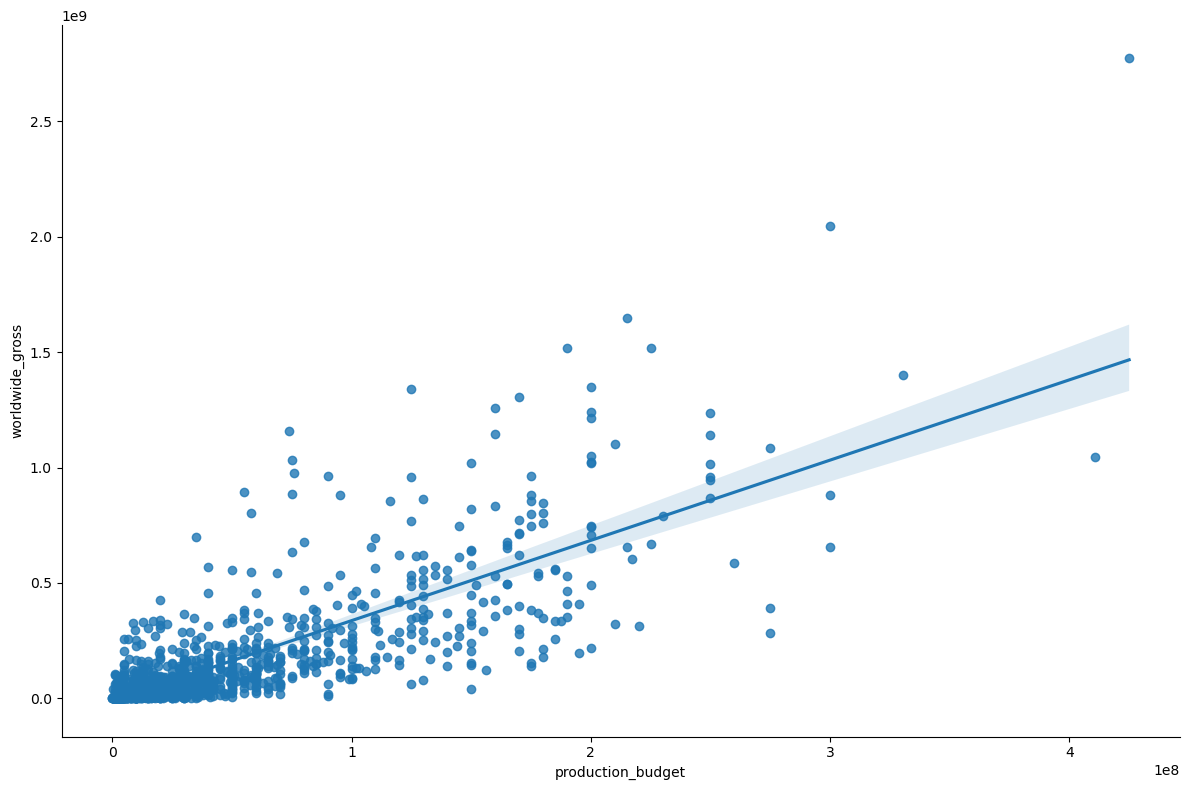

In [38]:
#create line of best fit
sns.lmplot(x = 'production_budget', y = 'worldwide_gross', data = movieData, height = 8, aspect = 1.5);

In [39]:
popularityMovie = remove_outliers(movieData, 'popularity')

In [40]:
popularity1Movie = remove_outliers(popularityMovie, 'domestic_gross')

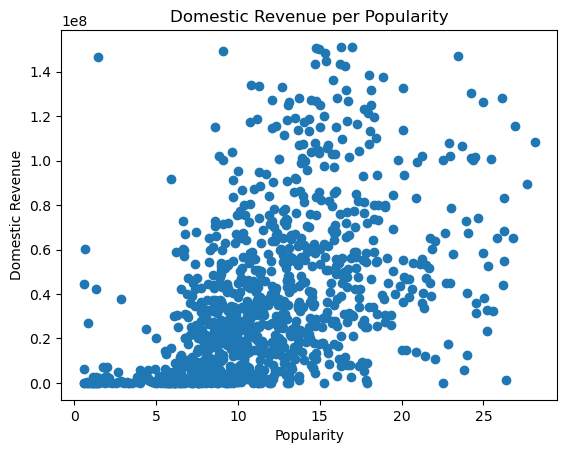

In [41]:
plt.scatter(popularity1Movie['popularity'], popularity1Movie['domestic_gross'])
plt.xlabel('Popularity')
plt.ylabel('Domestic Revenue')
plt.title('Domestic Revenue per Popularity')
plt.show()

C:\Users\anike\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


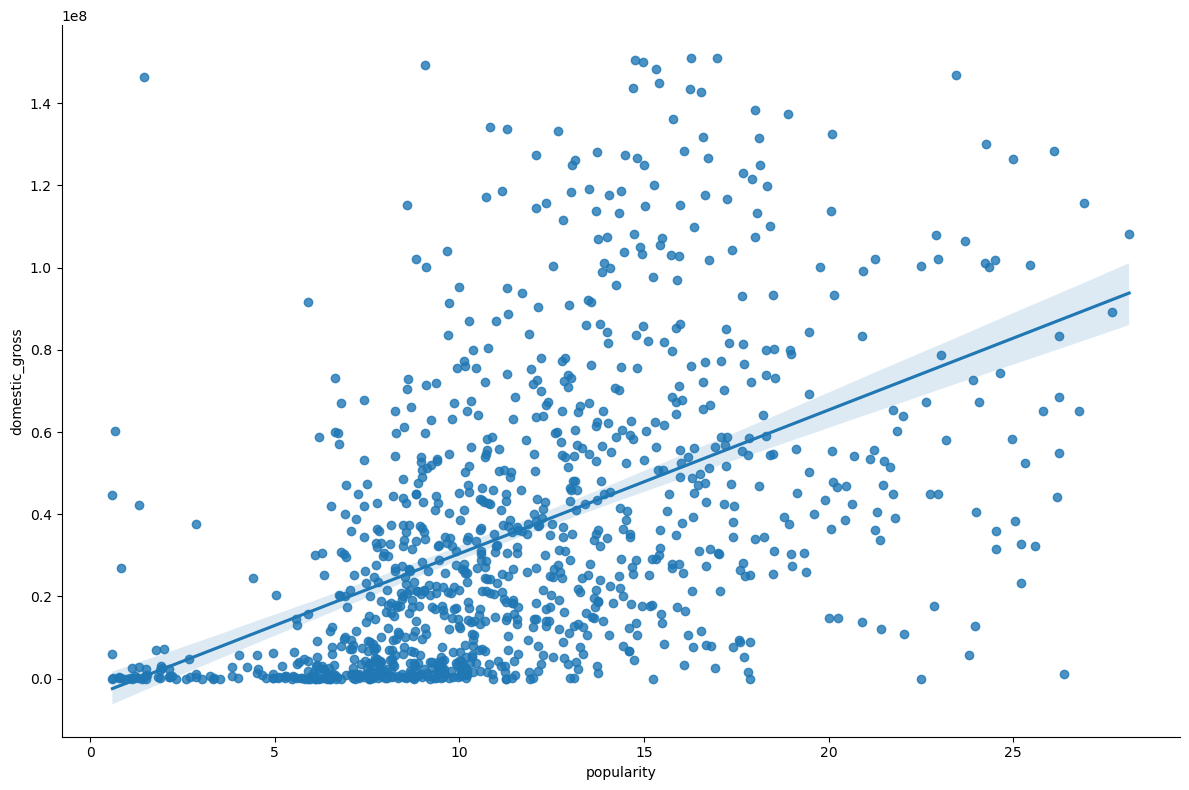

In [42]:
#create line of best fit
sns.lmplot(x = 'popularity', y = 'domestic_gross', data = popularity1Movie, height = 8, aspect = 1.5);

In [43]:
popularity2Movie = remove_outliers(popularityMovie, 'worldwide_gross')

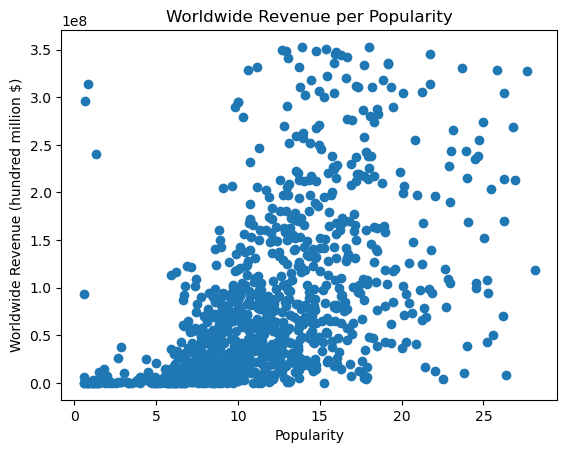

In [44]:
plt.scatter(popularity2Movie['popularity'], popularity2Movie['worldwide_gross'])
plt.xlabel('Popularity')
plt.ylabel('Worldwide Revenue (hundred million $)')
plt.title('Worldwide Revenue per Popularity')
plt.show()

C:\Users\anike\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


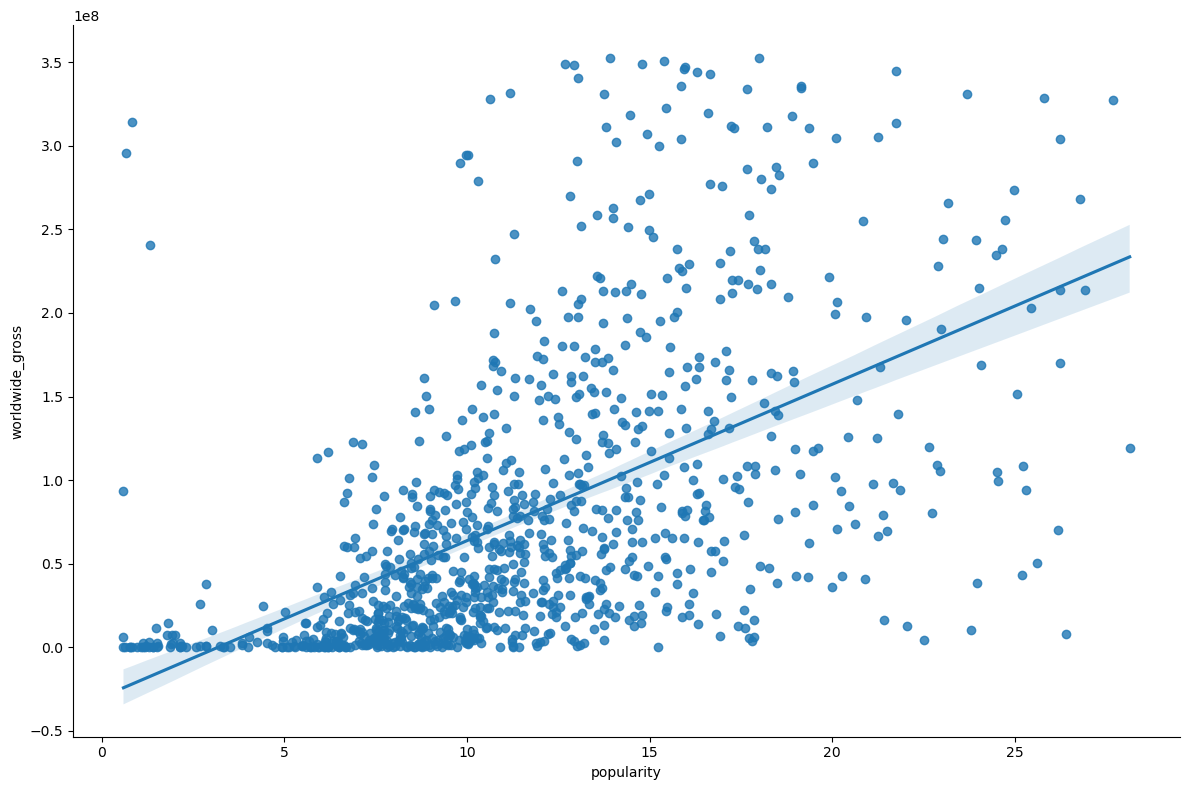

In [45]:
#create line of best fit
sns.lmplot(x = 'popularity', y = 'worldwide_gross', data = popularity2Movie, height = 8, aspect = 1.5);

In [46]:
#determine outliers
p25 = np.percentile(popularityMovie['dom_profit'], 25)
p75 = np.percentile(popularityMovie['dom_profit'], 75)
iqr = p75 - p25
outlier = p75 + (1.5 * iqr)
#create db that removes upper outliers
popularity3Movie = popularityMovie.drop(popularityMovie[popularityMovie['dom_profit'] > outlier].index)
popularity3Movie.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
13,"[16, 10751]",38757,en,Tangled,21.511,2010-11-24,Tangled,7.5,6407,260000000.0,200821936.0,586477240.0,0.772392,2.255682,-59178064.0,326477240.0
20,"[28, 18, 9648, 53]",2501,en,The Bourne Identity,17.935,2002-06-14,The Bourne Identity,7.4,5406,60000000.0,121468960.0,214357371.0,2.024483,3.572623,61468960.0,154357371.0
21,"[28, 35]",37834,en,Knight and Day,17.713,2010-06-23,Knight and Day,6.0,2494,117000000.0,76423035.0,258751370.0,0.653188,2.211550,-40576965.0,141751370.0
22,"[12, 10751, 14]",10140,en,The Chronicles of Narnia: The Voyage of the Da...,17.382,2010-12-10,The Chronicles of Narnia: The Voyage of the Da...,6.3,3196,155000000.0,104386950.0,418186950.0,0.673464,2.697980,-50613050.0,263186950.0
23,"[18, 10749]",41233,en,Step Up 3D,17.174,2010-08-06,Step Up 3D,6.7,1160,30000000.0,42400223.0,165889117.0,1.413341,5.529637,12400223.0,135889117.0


In [47]:
#determine outliers
p25 = np.percentile(popularity3Movie['dom_profit'], 25)
p75 = np.percentile(popularity3Movie['dom_profit'], 75)
iqr = p75 - p25
outlier = p25 - (1.5 * iqr)
#create db that removes lower outliers
popularity4Movie = popularity3Movie.drop(popularity3Movie[popularity3Movie['dom_profit'] < outlier].index)
popularity4Movie.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
20,"[28, 18, 9648, 53]",2501,en,The Bourne Identity,17.935,2002-06-14,The Bourne Identity,7.4,5406,60000000.0,121468960.0,214357371.0,2.024483,3.572623,61468960.0,154357371.0
21,"[28, 35]",37834,en,Knight and Day,17.713,2010-06-23,Knight and Day,6.0,2494,117000000.0,76423035.0,258751370.0,0.653188,2.211550,-40576965.0,141751370.0
22,"[12, 10751, 14]",10140,en,The Chronicles of Narnia: The Voyage of the Da...,17.382,2010-12-10,The Chronicles of Narnia: The Voyage of the Da...,6.3,3196,155000000.0,104386950.0,418186950.0,0.673464,2.697980,-50613050.0,263186950.0
23,"[18, 10749]",41233,en,Step Up 3D,17.174,2010-08-06,Step Up 3D,6.7,1160,30000000.0,42400223.0,165889117.0,1.413341,5.529637,12400223.0,135889117.0
24,"[53, 28, 12, 35, 80]",34544,en,The A-Team,17.097,2010-06-11,The A-Team,6.3,2703,110000000.0,77222099.0,177241171.0,0.702019,1.611283,-32777901.0,67241171.0


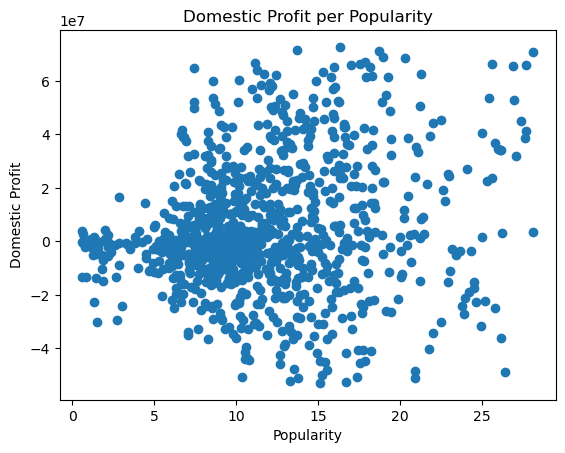

In [48]:
plt.scatter(popularity4Movie['popularity'], popularity4Movie['dom_profit'])
plt.xlabel('Popularity')
plt.ylabel('Domestic Profit')
plt.title('Domestic Profit per Popularity')
plt.show()

C:\Users\anike\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


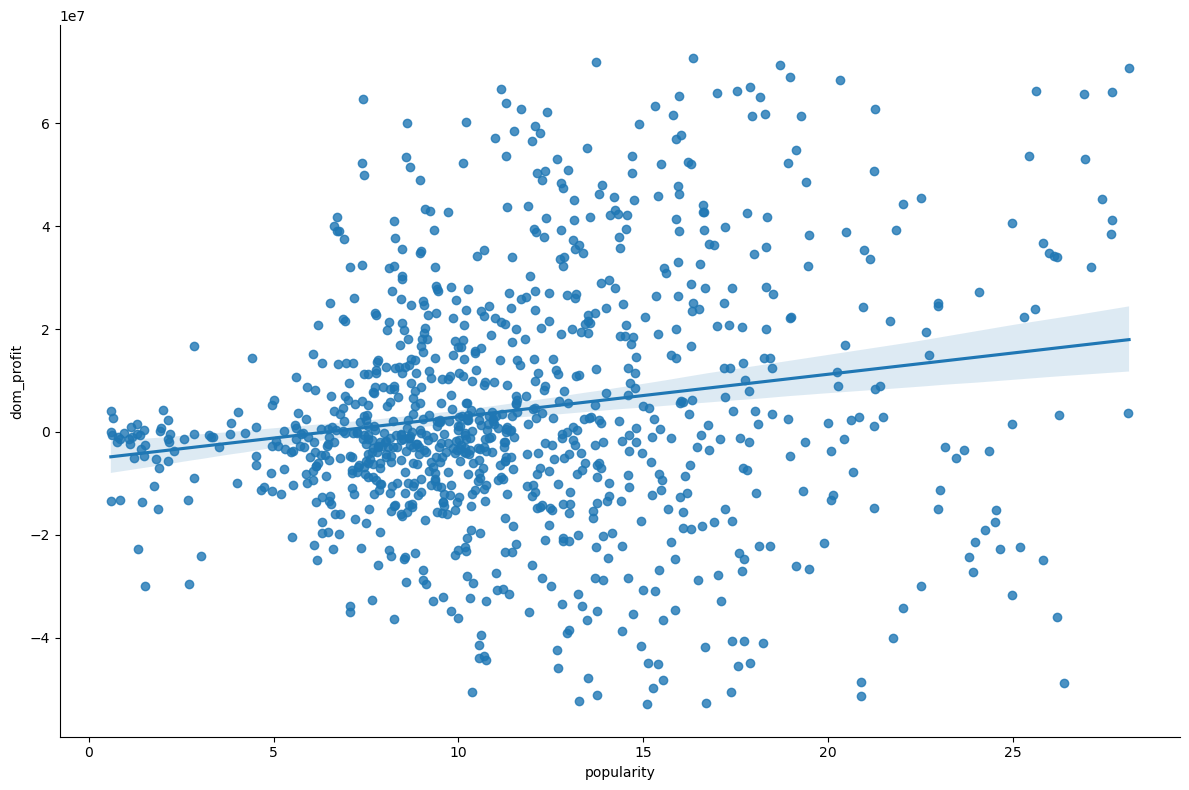

In [49]:
#create line of best fit
sns.lmplot(x = 'popularity', y = 'dom_profit', data = popularity4Movie, height = 8, aspect = 1.5);

In [50]:
popularity5Movie = remove_outliers(popularityMovie, 'profit')

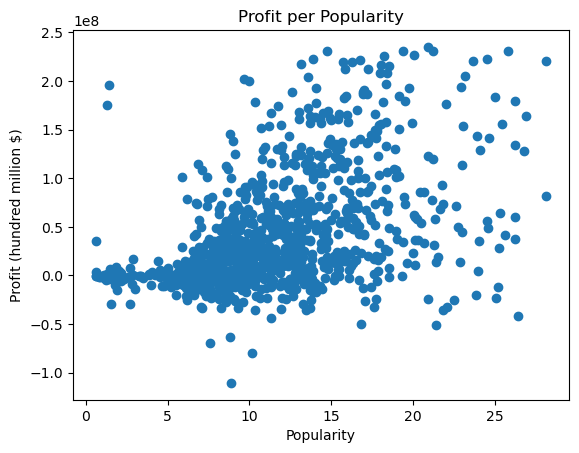

In [51]:
plt.scatter(popularity5Movie['popularity'], popularity5Movie['profit'],)
plt.xlabel('Popularity')
plt.ylabel('Profit (hundred million $)')
plt.title('Profit per Popularity')
plt.show()

C:\Users\anike\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


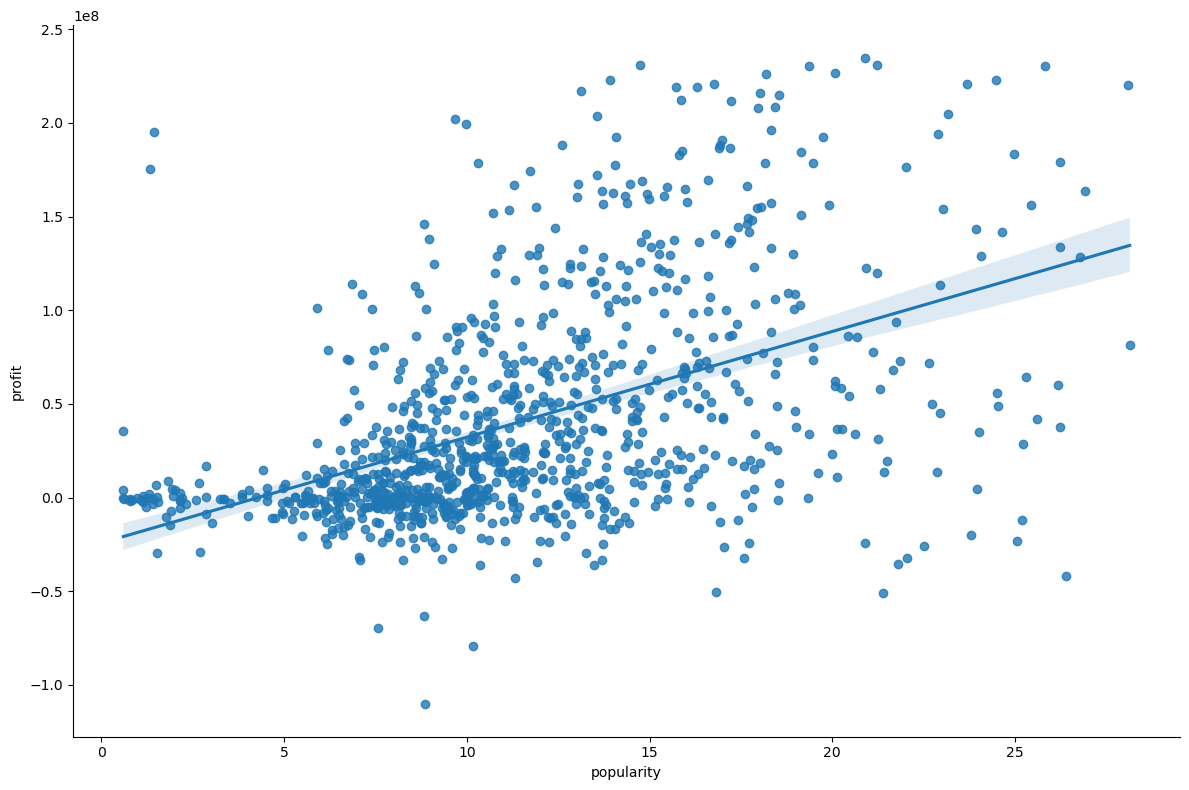

In [52]:
#create line of best fit
sns.lmplot(x = 'popularity', y = 'profit', data = popularity5Movie, height = 8, aspect = 1.5);

In [53]:
#population must have more than 100 votes
populationMovie = movieData.drop(movieData[movieData['vote_count']<100].index)
populationMovie.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,125000000.0,296131568.0,960431568.0,2.369053,7.683453,171131568.0,835431568.0
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0,1.318674,2.999218,52581232.0,329870992.0
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0,1.837843,3.653861,142433331.0,451156389.0
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0,6.393208,12.151517,161796233.0,334545516.0
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0,1.828601,5.222029,132576195.0,675524642.0


In [54]:
populationMovie.shape

(1099, 16)

In [55]:
#sample must have a vote average higher than 6
sampleMovie = movieData.drop(movieData[movieData['vote_average']<6].index)
sampleMovie.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,125000000.0,296131568.0,960431568.0,2.369053,7.683453,171131568.0,835431568.0
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0,1.318674,2.999218,52581232.0,329870992.0
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0,1.837843,3.653861,142433331.0,451156389.0
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0,6.393208,12.151517,161796233.0,334545516.0
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0,1.828601,5.222029,132576195.0,675524642.0


### To determine if there is a significant difference between the sample mean and the population mean, in either direction (greater than or less than).

In [56]:
#Run a two tail z test using a 95% confidence level
alpha = 0.025
x_bar = sampleMovie['worldwide_gross'].mean() #sample mean 
n = sampleMovie['worldwide_gross'].count() #number of samples

sigma = populationMovie['worldwide_gross'].std() #std of population
mu = populationMovie['worldwide_gross'].mean() #population mean 

In [57]:
#calculalte z-score
z = (x_bar - mu) / (sigma / sqrt(n))
z

1.5980660149340145

In [58]:
#calculate p-value
p_val = 1 - stats.norm.cdf(z)
#p_val = 2* (1 - stats.norm.cdf(z))
p_val

0.05501414304750596

In [59]:
#view results to identify if statistically significant
print('p-value', p_val)
print('alpha', alpha)

p-value 0.05501414304750596
alpha 0.025


In [62]:
if p_val < alpha:
    print('Reject Null Hypothesis')
elif p_val >= alpha:
    print('Fail to Reject Null Hypothesis')

Fail to Reject Null Hypothesis


### Since the p-value is greater than alpha, it fail to reject the null hypothesis, meaning there's not enough evidence to say that the sample mean is significantly different from the population mean.

In [64]:
alpha = 0.025
x_bar = sampleMovie['profit'].mean()
n = sampleMovie['profit'].count()

sigma = populationMovie['profit'].std()
mu = populationMovie['profit'].mean()

In [65]:
z = (x_bar - mu) / (sigma / sqrt(n))
z

2.026055652087964

In [66]:
p_val = 1 - stats.norm.cdf(z)
#p_val = 2* (1 - stats.norm.cdf(z))
p_val

0.021379540988707757

In [67]:
print('p-value', p_val)
print('alpha', alpha)

p-value 0.021379540988707757
alpha 0.025


In [70]:
if p_val < alpha:
    print('Reject Null Hypothesis')
elif p_val >= alpha:
    print('Fail to Reject Null Hypothesis')

Reject Null Hypothesis


### The p-value is less than alpha, so reject the null hypothesis. This means there is enough evidence to suggest that the sample mean is significantly different from the population mean

In [85]:
sampleStdMean = [(x-mu) / sigma for x in sampleMovie['profit']]
stdZMean = np.mean(sampleStdMean)
print(f'Sample Standarized Mean: {stdZMean}')

Sample Standarized Mean: 0.06982248874899841


Text(0.5, 1.0, 'Profit per Movie Rating')

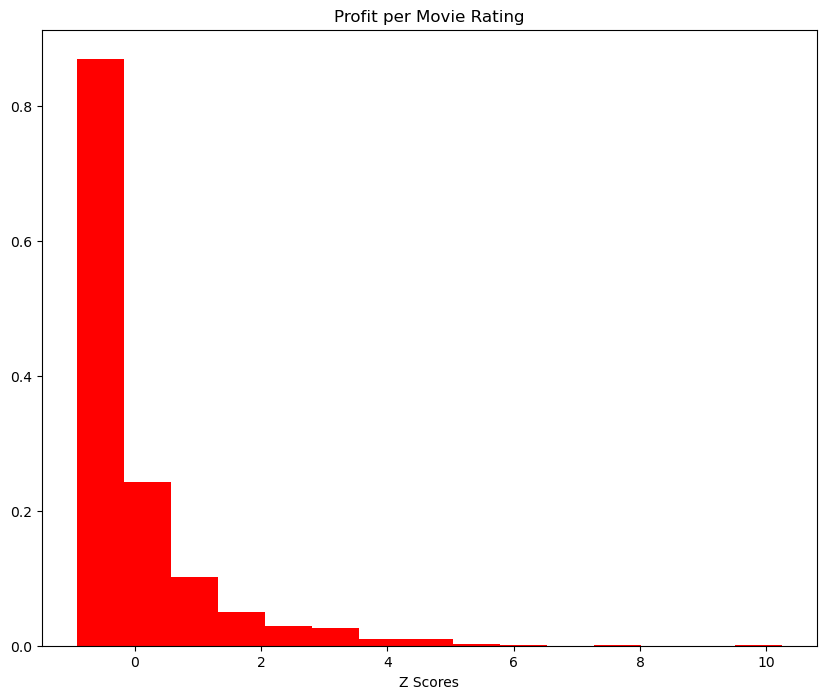

In [82]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(sampleStdMean, bins=15, density = True, color='r')
ax.set_xlabel('Z Scores')
ax.set_title('Profit per Movie Rating')

In [83]:
#applying normalized curve over histogram
sns.kdeplot(sampleStdMean, ax=ax, color='k')

# marking standardized_mean
ax.vlines(x=stdZMean, ymin=0, ymax=0.7, color='b', label='Mean: 0.2331')
ax.legend()

In [84]:
#standardizing population for secondary visualizations to follow
mu = populationMovie['profit'].mean()
std = populationMovie['profit'].std()

In [86]:
popStdMean = [(x-mu) / sigma for x in populationMovie['profit']]
popZmean = np.mean(popStdMean)
print(f'Population Standarized Mean: {popZmean}')

Population Standarized Mean: -4.2024820586357153e-17


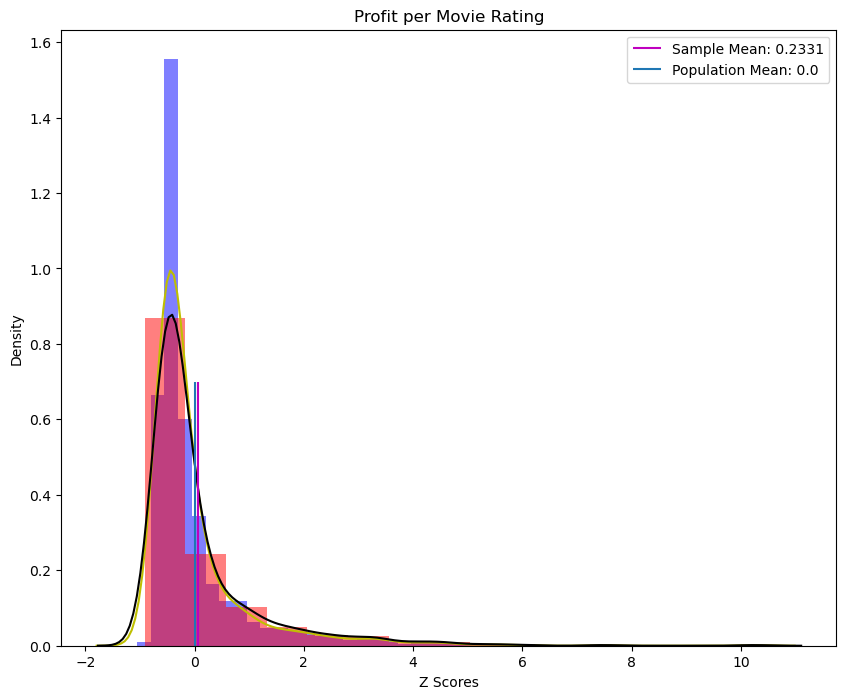

In [92]:
# plotting tested runtime sample against population
fig, ax = plt.subplots(figsize = (10,8))

plt.hist(popStdMean, bins=45, density=True, color='b', alpha=0.5)
sns.kdeplot(popStdMean, ax=ax, color='y')

plt.hist(sampleStdMean, bins=15, density=True, color='r', alpha=0.5)
sns.kdeplot(sampleStdMean, ax=ax, color='k')

plt.vlines(x=stdZMean, ymin=0, ymax=0.7, color='m', label='Sample Mean: 0.2331')
plt.vlines(x=popZmean, ymin=0, ymax=0.7, label='Population Mean: 0.0')

plt.xlabel('Z Scores')
plt.title('Profit per Movie Rating')
plt.legend()

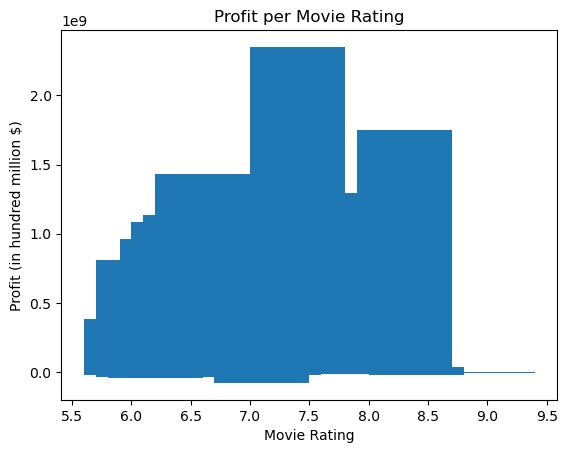

In [89]:
#graph visual
x = sampleMovie['vote_average']

y = sampleMovie['profit']

plt.bar(x, y)
plt.xlabel('Movie Rating')
plt.ylabel('Profit (in hundred million $)')
plt.title('Profit per Movie Rating')
plt.show()

In [94]:
#sample must have a popularity rating higher than 10
sampleMovie = movieData.drop(movieData[movieData['popularity'] < 10].index)
sampleMovie.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,production_budget,domestic_gross,worldwide_gross,dom_gross / budget,ww_gross / budget,dom_profit,profit
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,125000000.0,296131568.0,960431568.0,2.369053,7.683453,171131568.0,835431568.0
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,165000000.0,217581232.0,494870992.0,1.318674,2.999218,52581232.0,329870992.0
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,170000000.0,312433331.0,621156389.0,1.837843,3.653861,142433331.0,451156389.0
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,30000000.0,191796233.0,364545516.0,6.393208,12.151517,161796233.0,334545516.0
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,160000000.0,292576195.0,835524642.0,1.828601,5.222029,132576195.0,675524642.0


In [95]:
alpha = 0.025
x_bar = sampleMovie['worldwide_gross'].mean()
n = sampleMovie['worldwide_gross'].count()

sigma = movieData['worldwide_gross'].std()
mu = movieData['worldwide_gross'].mean()

In [96]:
z = (x_bar - mu) / (sigma / sqrt(n))
z

7.279446044051373

In [98]:
p_val = 1 - stats.norm.cdf(z)
p_val

1.6764367671839864e-13